In [1]:
# general purpose imports
import os
import sys
import numpy as np
import scipy

# SMRT imports
from smrt import make_snowpack, sensor_list, make_model
from smrt.utils import dB

# MEMLS bindings import
# you can disable MEMLS by setting to False
have_memls = True
# note that to import this binding, you need to install oct2py.
if have_memls:
    from smrt.utils import memls_legacy


# Graphics import
%matplotlib notebook
import matplotlib.pyplot as plt
color = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']

In [2]:
## prepare inputs: snowpack with two layers

density = [300]
temperature = [265]
thickness = [200]
corr_length = [100e-6]

snowpack = make_snowpack(thickness, "exponential",
                        density=density, temperature=temperature, corr_length=corr_length)

# create the sensor
theta = np.arange(10, 65, 5)
radiometer = sensor_list.passive(37e9, theta)
radar = sensor_list.active(37e9, theta)

<IPython.core.display.Javascript object>


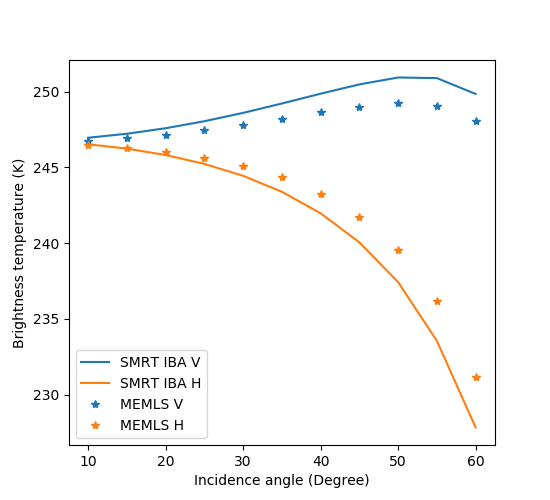

In [3]:
# create the SMRT Model with emmodel="dmrt_qcacp_shortrange" and rtsolver="dort"
m = make_model("iba_original", "dort")

# run the model
res_p = m.run(radiometer, snowpack)

# plots
f, axs =  plt.subplots(1, 1, figsize=(5.5,5))
axs = [axs]

axs[0].plot(theta, res_p.TbV(), label='SMRT IBA V', color=color[0])
axs[0].plot(theta, res_p.TbH(), label='SMRT IBA H', color=color[1])

axs[0].set_xlabel('Incidence angle (Degree)')
axs[0].set_ylabel ('Brightness temperature (K)')
axs[0].legend(loc='best')


In [4]:
def rmsd(x):
    return float(np.sqrt(np.mean(np.square(x))))

In [5]:
# run MEMLS in passive mode
if have_memls:
    res_memls = memls_legacy.run(radiometer, snowpack)

    axs[0].plot(theta, res_memls.TbV(), '*', label='MEMLS V', color=color[0])
    axs[0].plot(theta, res_memls.TbH(), '*', label='MEMLS H', color=color[1])
    
    print("RMSD(MEMLS-SMRT IBA EXP)", rmsd(res_memls.TbV()-res_p.TbV()), rmsd(res_memls.TbH()-res_p.TbH()))
    
    
print("MEMLS ks, ka=", memls_legacy.memls_emmodel(radiometer, snowpack.layers[0]))

em = m.emmodel(radiometer, snowpack.layers[0])
print("SMRT IBA ks, ka", em.ks, em.ka)
print("SMRT eps", em.effective_permittivity())

no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
no coherent layers detected: 37 GHz
RMSD(MEMLS-SMRT IBA EXP) 1.1873990188175292 1.618573419596577
epsi =  1.5244
MEMLS ks, ka= memls_emmodel(ks=0.20542420725262811, ka=0.30921544384096578)
SMRT IBA ks, ka 0.205657797376 0.308761748077
SMRT eps (1.52365200701+0.000545417016185j)


In [6]:
for ax in axs: ax.legend(loc='best')
#f.savefig("fig_smrt_memls.pdf")